In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
bdd = pd.read_csv("/neurospin/dico/agaudin/Runs/new_bdd_models.csv", index_col=0)
bdd

,model_path,auc,auc_std,accuracy,accuracy_std,backbone_name,batch_size,drop_rate,early_stopping_patience,foldlabel,...,max_angle,max_epochs,num_outputs,num_representation_features,temperature,temperature_initial,train_loss,val_loss,dataset_name,git_branch
0,/neurospin/dico/agaudin/Runs/03_monkeys/Output...,0.595940,0.045925,0.575977,0.035288,convnet,16,0.15,100,True,...,6,250,30,30,0.1,0.1,0.349243,0.515141,cingulate_HCP_half_1,Run_03_aymeric
1,/neurospin/dico/agaudin/Runs/03_monkeys/Output...,0.600870,0.040834,0.578182,0.038861,convnet,16,0.15,100,True,...,6,250,30,30,0.1,0.1,0.376334,0.615989,cingulate_HCP_half_1,Run_03_aymeric
2,/neurospin/dico/agaudin/Runs/03_monkeys/Output...,0.659754,0.048348,0.617584,0.042720,convnet,16,0.15,250,True,...,6,250,30,30,0.1,0.1,0.416473,0.440377,cingulate_HCP_half_1,Run_03_aymeric
3,/neurospin/dico/agaudin/Runs/03_monkeys/Output...,0.605214,0.042651,0.588129,0.037000,convnet,16,0.15,100,True,...,6,250,30,30,0.1,0.1,0.392093,0.608668,cingulate_HCP_half_1,Run_03_aymeric
4,/neurospin/dico/agaudin/Runs/03_monkeys/Output...,0.606865,0.044687,0.588305,0.037069,convnet,16,0.15,250,True,...,6,250,30,30,0.1,0.1,0.330082,0.690635,cingulate_HCP_half_1,Run_03_aymeric
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,/neurospin/dico/agaudin/Runs/04_pointnet/Outpu...,0.659243,0.006187,0.631214,0.009741,pointnet,16,0.05,100,False,...,10,250,30,30,0.1,0.1,1.053026,1.015665,cingulate_HCP_half_1,pointnet
127,/neurospin/dico/agaudin/Runs/04_pointnet/Outpu...,0.627033,0.018632,0.625161,0.012915,pointnet,16,0.10,100,False,...,10,250,30,30,0.1,0.1,1.952606,1.368340,cingulate_HCP_half_1,pointnet
128,/neurospin/dico/agaudin/Runs/04_pointnet/Outpu...,0.486872,0.025558,0.577713,0.000000,pointnet,16,0.15,100,False,...,10,250,4,4,0.1,0.1,4.179968,3.784941,cingulate_HCP_half_1,pointnet
129,/neurospin/dico/agaudin/Runs/04_pointnet/Outpu...,0.463362,0.009882,0.559331,0.002454,pointnet,16,0.05,100,False,...,10,250,4,4,0.1,0.1,3.744332,3.345133,cingulate_HCP_half_1,pointnet


In [3]:
nn_measured = bdd[bdd.model_path.str.contains("/neurospin/dico/agaudin/Runs/03_monkeys/Output/analysis_folders")]
nn_measured

,model_path,auc,auc_std,accuracy,accuracy_std,backbone_name,batch_size,drop_rate,early_stopping_patience,foldlabel,...,max_angle,max_epochs,num_outputs,num_representation_features,temperature,temperature_initial,train_loss,val_loss,dataset_name,git_branch
0,/neurospin/dico/agaudin/Runs/03_monkeys/Output...,0.595940,0.045925,0.575977,0.035288,convnet,16,0.15,100,True,...,6,250,30,30,0.1,0.1,0.349243,0.515141,cingulate_HCP_half_1,Run_03_aymeric
1,/neurospin/dico/agaudin/Runs/03_monkeys/Output...,0.600870,0.040834,0.578182,0.038861,convnet,16,0.15,100,True,...,6,250,30,30,0.1,0.1,0.376334,0.615989,cingulate_HCP_half_1,Run_03_aymeric
2,/neurospin/dico/agaudin/Runs/03_monkeys/Output...,0.659754,0.048348,0.617584,0.042720,convnet,16,0.15,250,True,...,6,250,30,30,0.1,0.1,0.416473,0.440377,cingulate_HCP_half_1,Run_03_aymeric
3,/neurospin/dico/agaudin/Runs/03_monkeys/Output...,0.605214,0.042651,0.588129,0.037000,convnet,16,0.15,100,True,...,6,250,30,30,0.1,0.1,0.392093,0.608668,cingulate_HCP_half_1,Run_03_aymeric
4,/neurospin/dico/agaudin/Runs/03_monkeys/Output...,0.606865,0.044687,0.588305,0.037069,convnet,16,0.15,250,True,...,6,250,30,30,0.1,0.1,0.330082,0.690635,cingulate_HCP_half_1,Run_03_aymeric
5,/neurospin/dico/agaudin/Runs/03_monkeys/Output...,0.581583,0.057815,0.562100,0.052206,convnet,16,0.15,100,True,...,6,250,4,4,0.1,0.1,4.480739,2.831487,cingulate_HCP_half_1,Run_03_aymeric
6,/neurospin/dico/agaudin/Runs/03_monkeys/Output...,0.658169,0.039913,0.675953,0.025605,convnet,16,0.15,100,True,...,6,250,4,4,0.1,0.1,3.525009,3.058584,cingulate_HCP_half_1,Run_03_aymeric
7,/neurospin/dico/agaudin/Runs/03_monkeys/Output...,0.624676,0.048144,0.630076,0.021029,convnet,16,0.15,100,True,...,6,250,4,4,0.1,0.1,3.251271,2.774460,cingulate_HCP_half_1,Run_03_aymeric
8,/neurospin/dico/agaudin/Runs/03_monkeys/Output...,0.530707,0.044796,0.506229,0.049234,convnet,16,0.15,250,True,...,6,250,4,4,0.1,0.1,7.934582,6.433455,cingulate_HCP_half_1,Run_03_aymeric
9,/neurospin/dico/agaudin/Runs/03_monkeys/Output...,0.571589,0.048066,0.518147,0.047136,convnet,16,0.15,100,True,...,6,250,4,4,0.1,0.1,8.128778,6.433416,cingulate_HCP_half_1,Run_03_aymeric


In [13]:
nn_dist = pd.read_csv("/neurospin/dico/agaudin/Runs/03_monkeys/Output/analysis_folders/#performance_comparisons/nn/nne_ln.csv", index_col=0)
nn_dist

,convnet,densenet2
foldlabel_30,0.433729,0.596620
foldlabel_4,0.783451,0.731105
no_foldlabel_30,0.324525,0.422612
no_foldlabel_4,0.849684,0.750240


In [10]:
parameters = ['backbone_name','foldlabel','num_representation_features']

In [26]:
std_values = nn_measured.groupby(parameters).auc_std.mean()
print(std_values)


std_df = np.zeros((4,2))
std_df[:,0] = std_values['convnet'][::-1]
std_df[:,1] = std_values['densenet'][::-1]


std_df = pd.DataFrame(std_df, columns=nn_dist.columns, index=nn_dist.index)
std_df

backbone_name  foldlabel  num_representation_features
convnet        False      4                              0.041530
                          30                             0.044261
               True       4                              0.046475
                          30                             0.044489
densenet       False      4                              0.028280
                          30                             0.038345
               True       4                              0.031609
                          30                             0.049897
Name: auc_std, dtype: float64


,convnet,densenet2
foldlabel_30,0.044489,0.049897
foldlabel_4,0.046475,0.031609
no_foldlabel_30,0.044261,0.038345
no_foldlabel_4,0.041530,0.028280


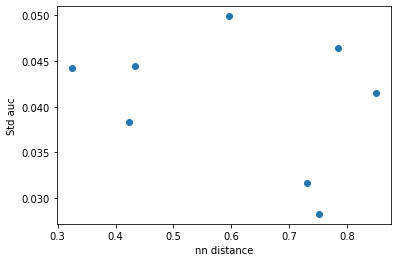

In [31]:
plt.scatter(nn_dist.values.flatten(), std_df.values.flatten())
plt.xlabel("nn distance")
plt.ylabel("Std auc")
plt.show()

## Pointnet

In [32]:
pointnets = bdd[bdd.backbone_name == 'pointnet']
pointnets

,model_path,auc,auc_std,accuracy,accuracy_std,backbone_name,batch_size,drop_rate,early_stopping_patience,foldlabel,...,max_angle,max_epochs,num_outputs,num_representation_features,temperature,temperature_initial,train_loss,val_loss,dataset_name,git_branch
85,/neurospin/dico/agaudin/Runs/04_pointnet/Outpu...,0.676890,0.006477,0.658792,0.007721,pointnet,16,0.05,100,True,...,6,250,30,30,0.10,0.10,1.691467,2.001589,cingulate_HCP_half_1,pointnet
86,/neurospin/dico/agaudin/Runs/04_pointnet/Outpu...,0.633446,0.009114,0.632540,0.010598,pointnet,16,0.05,100,False,...,10,250,30,30,0.10,0.10,1.246490,0.742785,cingulate_HCP_half_1,pointnet
87,/neurospin/dico/agaudin/Runs/04_pointnet/Outpu...,0.499626,0.009911,0.548927,0.007395,pointnet,16,0.05,100,True,...,6,250,4,4,0.50,0.50,4.576673,4.585703,cingulate_HCP_full,pointnet
88,/neurospin/dico/agaudin/Runs/04_pointnet/Outpu...,0.659615,0.005971,0.631543,0.005587,pointnet,16,0.05,100,True,...,6,250,4,4,0.50,0.50,4.577002,4.646541,cingulate_HCP_full,pointnet
89,/neurospin/dico/agaudin/Runs/04_pointnet/Outpu...,0.630003,0.009412,0.622545,0.006342,pointnet,16,0.05,100,False,...,10,250,30,30,0.10,0.10,1.673291,1.461953,cingulate_HCP_half_1,pointnet
90,/neurospin/dico/agaudin/Runs/04_pointnet/Outpu...,0.672935,0.013104,0.594358,0.004636,pointnet,16,0.05,100,True,...,6,250,4,4,0.50,0.50,4.635521,4.643420,cingulate_HCP_full,pointnet
91,/neurospin/dico/agaudin/Runs/04_pointnet/Outpu...,0.517515,0.009011,0.562968,0.002984,pointnet,16,0.05,100,True,...,6,250,4,4,0.50,0.50,4.544183,4.529235,cingulate_HCP_full,pointnet
92,/neurospin/dico/agaudin/Runs/04_pointnet/Outpu...,0.583615,0.003723,0.602346,0.002944,pointnet,16,0.05,100,True,...,6,250,4,4,0.50,0.50,4.667727,4.613417,cingulate_HCP_full,pointnet
93,/neurospin/dico/agaudin/Runs/04_pointnet/Outpu...,0.661953,0.003243,0.658041,0.003178,pointnet,16,0.05,100,True,...,6,250,4,4,0.50,0.50,4.674354,4.030462,cingulate_HCP_half_1,pointnet
94,/neurospin/dico/agaudin/Runs/04_pointnet/Outpu...,0.627749,0.004010,0.636903,0.004372,pointnet,16,0.05,100,True,...,6,250,4,4,0.50,0.50,5.068661,4.258512,cingulate_HCP_half_1,pointnet


In [42]:
parameters = ['batch_size', 'drop_rate','foldlabel', 'lr',
       'num_outputs', 'num_representation_features', 'temperature',
       'temperature_initial', 'dataset_name']

In [46]:
conditions = pointnets.groupby(parameters).model_path.count()
relevant_conds = conditions[conditions > 1]
relevant_conds

batch_size  drop_rate  foldlabel  lr      num_outputs  num_representation_features  temperature  temperature_initial  dataset_name        
16          0.05       False      0.0004  30           30                           0.1          0.1                  cingulate_HCP_half_1    4
                       True       0.0004  4            4                            0.5          0.5                  cingulate_HCP_full      5
                                                                                                                      cingulate_HCP_half_1    5
                                          30           30                           0.1          0.1                  cingulate_HCP_full      5
                                                                                                                      cingulate_HCP_half_1    7
            0.15       False      0.0004  30           30                           0.1          0.1                  cingulate_HCP_half_1   

In [47]:
relevant_conds.index

MultiIndex([(16, 0.05, False, 0.0004, 30, 30, 0.1, 0.1, ...),
            (16, 0.05,  True, 0.0004,  4,  4, 0.5, 0.5, ...),
            (16, 0.05,  True, 0.0004,  4,  4, 0.5, 0.5, ...),
            (16, 0.05,  True, 0.0004, 30, 30, 0.1, 0.1, ...),
            (16, 0.05,  True, 0.0004, 30, 30, 0.1, 0.1, ...),
            (16, 0.15, False, 0.0004, 30, 30, 0.1, 0.1, ...),
            (16, 0.15,  True, 0.0004, 30, 30, 0.1, 0.1, ...),
            (16, 0.15,  True, 0.0004, 30, 30, 0.5, 0.5, ...)],
           names=['batch_size', 'drop_rate', 'foldlabel', 'lr', 'num_outputs', 'num_representation_features', 'temperature', 'temperature_initial', 'dataset_name'])